# Basic Pandas Data Engineering
Author: W. Tod Newman

## Learning Objectives


*   Learn how to import files into Pandas Dataframes and how to develop understanding of what's in the data
*   Learn how to access and manipulate the data in the DataFrame
*   Learn how to do vectorized math and Boolean Filtering on the Dataframe.
*   Understand the best ways to do looping in Python
*   Understand some simple approaches to data ingest and how they compare.

In this exercise we're using data from the UC Irvine Open Data archive.  This data is in .CSV format and is easily pulled into Pandas.  See the Handling Complex Data files notebook for details on how to manipulate larger, zipped files from UCI.

## Contents
* [Basic Pandas Data Operations](#scrollTo=gk7FpEzVbu7X)
* [Python Loop Optimization Demonstration](#scrollTo=keF9jUSWOVVf)
* [Python Data Ingest Optimization for Speed and Memory Footprint](#scrollTo=zRYJZ1EkI4Nr&line=16&uniqifier=1)

In [ ]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
!pip install line_profiler

# Basic Pandas Operations
## Import a Data File and Read it Into a Pandas DataFrame

Here  we pull data from the UC Irvine open data repository.  This data is useful because often it can be used to test algorithms and ML workflows.  Plus, it works well in CoLaboratory because when we load it into the Google CoLaboratory system it doesn't need to pass through the firewall.

First we read the file in as a .CSV and then we print the dataframe.  You can print the dataframe by merely typing "df" only if you do it on the last line.  Otherwise, you need to print(df).  The formatting of the latter will be less pleasant than the former, BTW.

You can comment out any of the last 4 lines to see what those lines do.  The last one uncommented will be printed.

In [ ]:
# Get COVID-19 Files from JHU GitHub
!wget -O time_series_19-covid-Confirmed.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
!wget -O time_series_19-covid-Deaths.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
!wget -O time_series_19-covid-Recovered.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv

# Grab Data from Tod's GitHub
!wget -O world_pop_data.csv https://raw.githubusercontent.com/todnewman/data/master/covid19/world_pop_data.csv
!wget -O china_pop_data.csv https://raw.githubusercontent.com/todnewman/data/master/covid19/china_pop_data.csv

--2022-02-14 18:36:44--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1085029 (1.0M) [text/plain]
Saving to: ‘time_series_19-covid-Confirmed.csv’

time_series_19-covi 100%[===================>]   1.03M  --.-KB/s    in 0.05s   

2022-02-14 18:36:44 (19.7 MB/s) - ‘time_series_19-covid-Confirmed.csv’ saved [1085029/1085029]

--2022-02-14 18:36:44--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133,

## Read Parkinson's Data into a Pandas Dataframe

We'll use this data to demonstrate some basic capabilities of Pandas.  Then we'll show how it all comes together using the COVID-19 Data we just downloaded in the previous step.

In [ ]:
# Grab Data from UC Irvine archives.  Do some basic Pandas actions.
width = 20
height = 10
df = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

# Misc things you can do with a DataFrame

#df.tail(2) # Last 2 records
#df.keys() # List of all the Columns
#print(df['name']) # The column with the header 'name'

# Grab a specific Value from the DataFrame

row_indexer = 19
column_indexer = 12
print(df.iloc[row_indexer,column_indexer])

# All the values in column 12

#print(df.iloc[:,12])  

# Records/Rows 0 through 10

#print(df[10:40] )




# Plot all the parameters

'''df.plot(figsize=(width,height))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()'''

#df.head() # First 5 records

0.02374


"df.plot(figsize=(width,height))\nplt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))\nplt.tight_layout()\nplt.show()"

## Print Column Headers (keys) and Use for Quick Data Exploration

This is a useful thing to do.  If you assign df.keys() to a variable, it becomes a Python list.  You can iterate through the list to access the individual keys one by one or you can access each parameter in the list with it's index (i.e., keys[3]).  This is a useful way to select features without having to know the name of the header.

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype='object')

MDVP:Flo(Hz)


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

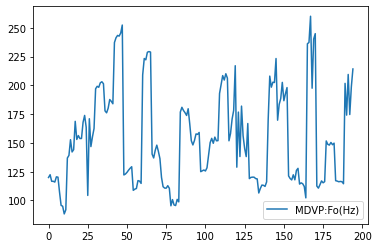

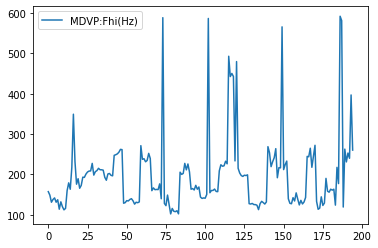

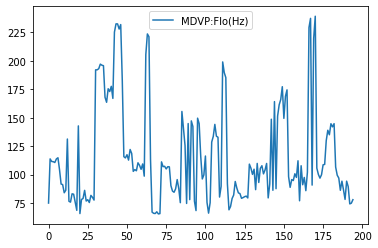

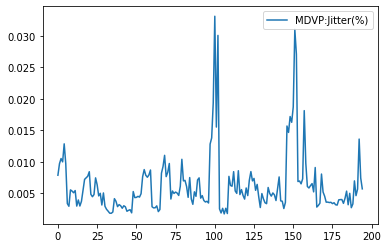

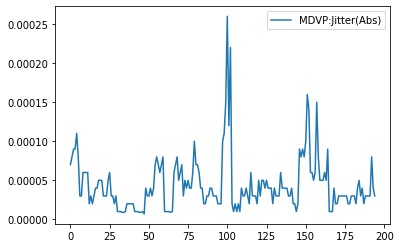

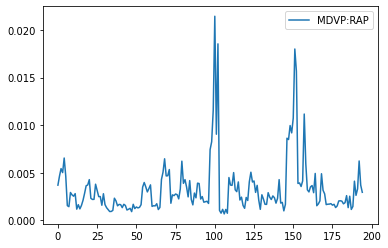

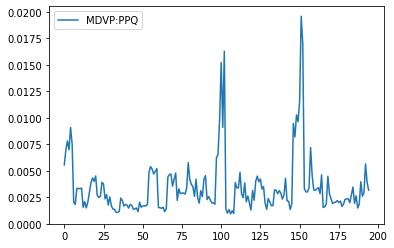

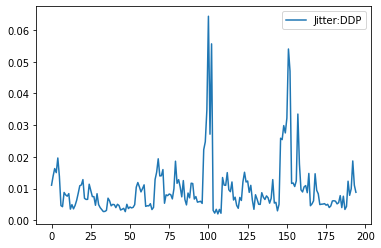

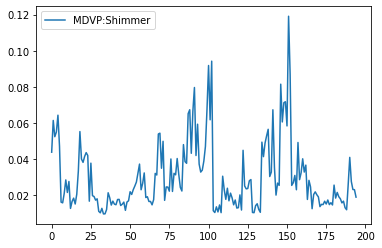

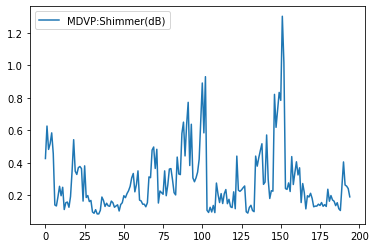

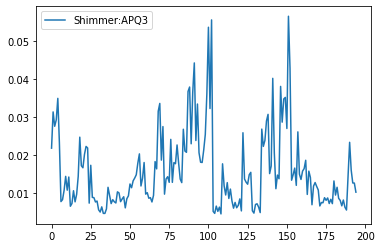

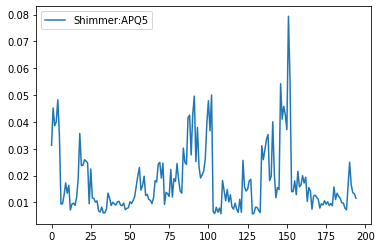

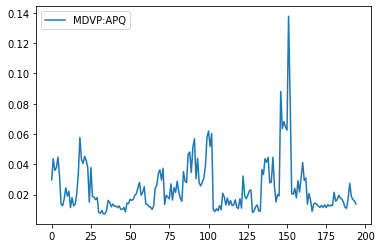

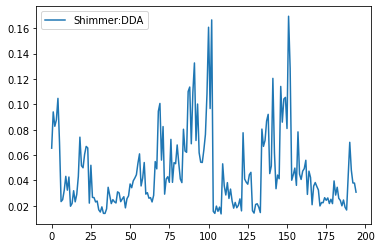

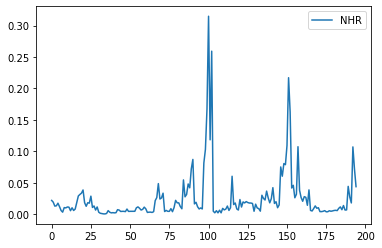

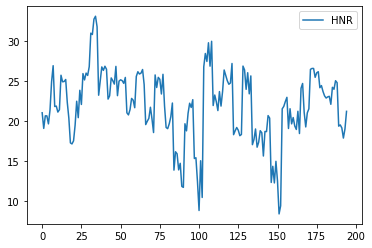

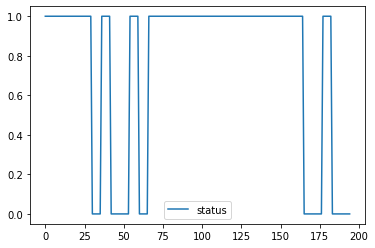

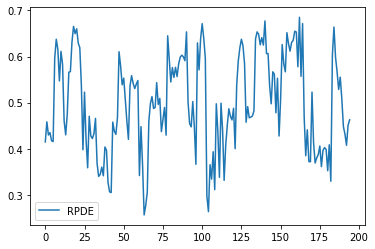

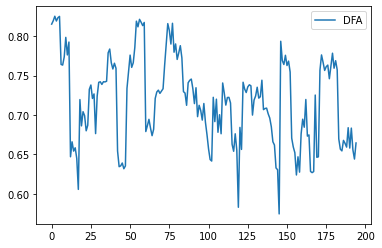

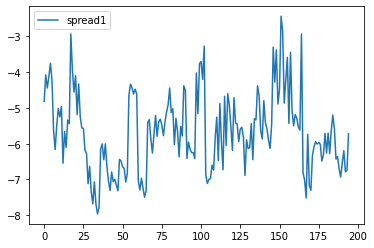

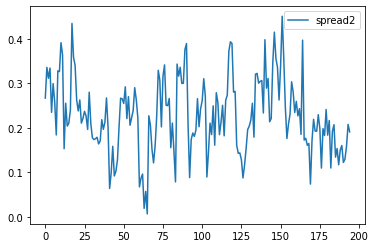

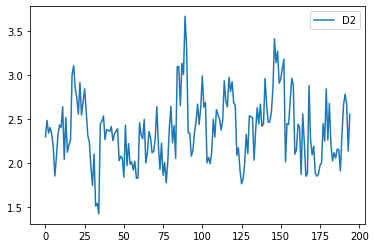

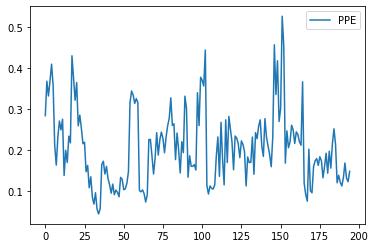

In [ ]:
keys = df.keys()
print (keys)
print()
print(keys[3]) # Handy in case you don't want to type the name

# iterate through the keys.  Here's a useful way to do data exploration.
for i,k in enumerate(keys):
    if i>0:
        df.plot( y=keys[i])

## Information on the DataFrame

Pandas gives us a couple of useful calls to get info on the different features in the DataFrame.

In [ ]:
print (df.info())
print (df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

## Accessing parameters in the DataFrame

You can see from the below how Pandas gives access to the index, columns, and values of the DataFrame.  You can use .columns to change the header names if that's desirable.  Understanding the shape of the dataframe (in this case, it is 195 rows by 24 columns) will help you understand if you get shape mismatch errors.

In [ ]:
print (df.index)
print ("Shape of the Dataframe is: ", df.shape)

print (df.columns)  # Same thing as df.keys()

print (df.values)

RangeIndex(start=0, stop=195, step=1)
Shape of the Dataframe is:  (195, 24)
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype='object')
[['phon_R01_S01_1' 119.992 157.302 ... 0.266482 2.301442 0.284654]
 ['phon_R01_S01_2' 122.4 148.65 ... 0.33559 2.486855 0.368674]
 ['phon_R01_S01_3' 116.682 131.111 ... 0.311173 2.342259 0.332634]
 ...
 ['phon_R01_S50_4' 174.688 240.005 ... 0.158453 2.679772 0.131728]
 ['phon_R01_S50_5' 198.764 396.961 ... 0.207454 2.138608 0.123306]
 ['phon_R01_S50_6' 214.289 260.277 ... 0.190667 2.555477 0.148569]]


## Sorting

sort_values is useful.  You can either sort by something like I did here (keys[3]) or you can sort by the header name ('MDVP:Flo(Hz)').  

In [ ]:
keys = df.keys()

print (keys[1:6])

df.sort_values(keys[6], ascending=False)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)'], dtype='object')


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1   spread2        D2       PPE
100  phon_R01_S24_4      125.641       141.068       116.346         0.03316          0.000260   0.02144   0.01522     0.06433       0.09178             0.891       0.05358       0.04791   0.06196      0.16074  0.31482   8.867       1  0.671299  0.656846 -3.700544  0.260481  2.991063  0.370961
102  phon_R01_S24_6      139.224       586.567        66.157         0.03011          0.000220   0.01854   0.01628     0.05563       0.09419             0.930       0.05551       0.05005   0.06023      0.16654  0.25930  10.489       1  0.596362  0.641418 -3.269487  0.270641  2.690917  0.444774
151  phon_R01_S35_6      192.818       224.429       168.793         0.03107          0.000160   0.01800   0.01958     0.05401       0.11908             1.302       0.05647       0.07940   0.13778      0.16942  0.21713   8.441       1  0.625866  0.768320 -2.434031  0.450493  3.079221  0.527367
152  phon_R01_S35_7      198.116       233.099       174.478         0.02714          0.000140   0.01568   0.01699     0.04705       0.08684             1.018       0.04284       0.05556   0.08318      0.12851  0.16265   9.449       1  0.584164  0.754449 -2.839756  0.356224  3.184027  0.454721
99   phon_R01_S24_3      126.512       141.756        99.770         0.01936          0.000150   0.01159   0.00990     0.03476       0.06734             0.659       0.03611       0.03963   0.05783      0.10833  0.16744  12.435       1  0.638545  0.674953 -3.760348  0.242861  2.634633  0.378483
157  phon_R01_S37_5      117.963       134.209       100.757         0.01813          0.000150   0.01117   0.00718     0.03351       0.04912             0.438       0.02610       0.02161   0.02916      0.07830  0.10748  19.075       1  0.630547  0.646786 -3.444478  0.303214  2.964568  0.261305
150  phon_R01_S35_5      186.695       211.961       149.442         0.01872          0.000100   0.01075   0.01154     0.03225       0.05830             0.784       0.02699       0.03714   0.06259      0.08096  0.10952  12.529       1  0.507826  0.762726 -4.484303  0.340256  2.958815  0.301487
148  phon_R01_S35_3      188.620       216.302       165.982         0.01719          0.000090   0.00996   0.01027     0.02987       0.07118             0.722       0.03474       0.04580   0.06824      0.10422  0.08069  12.298       1  0.552870  0.764036 -3.377325  0.335357  3.274865  0.418646
149  phon_R01_S35_4      202.632       565.740       177.258         0.01627          0.000080   0.00919   0.00963     0.02756       0.07170             0.833       0.03515       0.04265   0.06460      0.10546  0.07889  14.989       1  0.427627  0.775708 -4.892495  0.262281  2.910213  0.270173
101  phon_R01_S24_5      128.451       150.449        75.632         0.01551          0.000120   0.00905   0.00909     0.02716       0.06170             0.584       0.03223       0.03672   0.05174      0.09669  0.11843  15.060       1  0.639808  0.643327 -4.202730  0.310163  2.638279  0.356881
146  phon_R01_S35_1      169.774       191.759       151.451         0.01568          0.000090   0.00863   0.00946     0.02589       0.08143             0.821       0.03804       0.05426   0.08808      0.11411  0.07530  12.359       1  0.561610  0.793509 -3.297668  0.414758  3.413649  0.457533
147  phon_R01_S35_2      183.520       216.814       161.340         0.01466          0.000080   0.00849   0.00819     0.02546       0.06050             0.618       0.02865       0.04101   0.06359      0.08595  0.06057  14.367       1  0.478024  0.768974 -4.276605  0.355736  3.142364  0.336085
98   phon_R01_S24_2      125.791       140.557        96.206         0.01378          0.000110   0.00826   0.00655     0.02478       0.04689             0.422       0.02542       0

## Print out selected Columns in the DataFrame

This allows you to pick which columns you want to see.  The first line selects just one column.  The second shows how you can select a slice (multiple contiguous columnts). The third shows how you can just select discrete sets of columns.  The fourth line shows us passing an array of headers to the DataFrame.  You will probably notice that this isn't much different than the approach for the 3rd line.

In [ ]:
#df[keys[1]]
#df[keys[1:6]]
#df[['MDVP:Fo(Hz)', 'MDVP:Jitter(%)']]
my_header_list = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:PPQ']
df2 = df[my_header_list]
df2.to_csv('three_cols.csv')
df2

MDVP:Fo(Hz)  MDVP:Jitter(%)  MDVP:PPQ
0        119.992         0.00784   0.00554
1        122.400         0.00968   0.00696
2        116.682         0.01050   0.00781
3        116.676         0.00997   0.00698
4        116.014         0.01284   0.00908
5        120.552         0.00968   0.00750
6        120.267         0.00333   0.00202
7        107.332         0.00290   0.00182
8         95.730         0.00551   0.00332
9         95.056         0.00532   0.00332
10        88.333         0.00505   0.00330
11        91.904         0.00540   0.00336
12       136.926         0.00293   0.00153
13       139.173         0.00390   0.00208
14       152.845         0.00294   0.00149
15       142.167         0.00369   0.00203
16       144.188         0.00544   0.00292
17       168.778         0.00718   0.00387
18       153.046         0.00742   0.00432
19       156.405         0.00768   0.00399
20       153.848         0.00840   0.00450
21       153.880         0.00480   0.00267
22       167.930         0.00442   0.00247
23       173.917         0.00476   0.00258
24       163.656         0.00742   0.00390
25       104.400         0.00633   0.00375
26       171.041         0.00455   0.00234
27       146.845         0.00496   0.00275
28       155.358         0.00310   0.00176
29       162.568         0.00502   0.00253
30       197.076         0.00289   0.00168
31       199.228         0.00241   0.00138
32       198.383         0.00212   0.00135
33       202.266         0.00180   0.00107
34       203.184         0.00178   0.00106
35       201.464         0.00198   0.00115
36       177.876         0.00411   0.00241
37       176.170         0.00369   0.00218
38       180.198         0.00284   0.00166
39       187.733         0.00316   0.00182
40       186.163         0.00298   0.00175
41       184.055         0.00258   0.00147
42       237.226         0.00298   0.00182
43       241.404         0.00281   0.00173
44       243.439         0.00210   0.00137
45       242.852         0.00225   0.00139
46       245.510         0.00235   0.00148
47       252.455         0.00185   0.00113
48       122.188         0.00524   0.00203
49       122.964         0.00428   0.00155
50       124.445         0.00431   0.00167
51       126.344         0.00448   0.00169
52       128.001         0.00436   0.00166
53       129.336         0.00490   0.00183
54       108.807         0.00761   0.00486
55       109.860         0.00874   0.00539
56       110.417         0.00784   0.00514
57       117.274         0.00752   0.00469
58       116.879         0.00788   0.00493
59       114.847         0.00867   0.00520
60       209.144         0.00282   0.00152
61       223.365         0.00264   0.00151
62       222.236         0.00266   0.00144
63       228.832         0.00296   0.00155
64       229.401         0.00205   0.00113
65       228.969         0.00238   0.00140
66       140.341         0.00817   0.00440
67       136.969         0.00923   0.00463
68       143.533         0.01101   0.00467
69       148.090         0.00762   0.00354
70       142.729         0.00831   0.00419
71       136.358         0.00971   0.00478
72       120.080         0.00405   0.00220
73       112.014         0.00533   0.00329
74       110.793         0.00494   0.00283
75       110.707         0.00516   0.00289
76       112.876         0.00500   0.00289
77       110.568         0.00462   0.00280
78        95.385         0.00608   0.00332
79       100.770         0.01038   0.00576
80        96.106         0.00694   0.00415
81        95.605         0.00702   0.00371
82       100.960         0.00606   0.00348
83        98.804         0.00432   0.00258
84       176.858         0.00747   0.00420
85       180.978         0.00406   0.00244
86       178.222         0.00321   0.00194
87       176.281         0.00520   0.00312
88       173.898         0.00448   0.00254
89       179.711         0.00709   0.00419
90       166.605         0.00742   0.00453
91       151.955         0.00419   0.00227
92    

In [ ]:
!ls -l /content

total 2824
-rw-r--r-- 1 root root     732 Feb 14 18:36 china_pop_data.csv
-rw-r--r-- 1 root root  224300 Feb 14 15:34 NYC_hotels.csv
drwxr-xr-x 1 root root    4096 Feb  1 14:32 sample_data
-rw-r--r-- 1 root root    5300 Feb 14 18:48 three_cols.csv
-rw-r--r-- 1 root root 1085029 Feb 14 18:36 time_series_19-covid-Confirmed.csv
-rw-r--r-- 1 root root  755927 Feb 14 18:36 time_series_19-covid-Deaths.csv
-rw-r--r-- 1 root root  793771 Feb 14 18:36 time_series_19-covid-Recovered.csv
-rw-r--r-- 1 root root   11346 Feb 14 18:36 world_pop_data.csv


In [ ]:
#df[2:8] # Filter out 3 rows in the DataFrame
df.loc[:,[keys[1], keys[7]]] # Filter headers 1 and 7 for all records
#df.loc[1:4,[keys[1], keys[7]]] # Filter headers 1 and y for just three records

MDVP:Fo(Hz)  MDVP:PPQ
0        119.992   0.00554
1        122.400   0.00696
2        116.682   0.00781
3        116.676   0.00698
4        116.014   0.00908
5        120.552   0.00750
6        120.267   0.00202
7        107.332   0.00182
8         95.730   0.00332
9         95.056   0.00332
10        88.333   0.00330
11        91.904   0.00336
12       136.926   0.00153
13       139.173   0.00208
14       152.845   0.00149
15       142.167   0.00203
16       144.188   0.00292
17       168.778   0.00387
18       153.046   0.00432
19       156.405   0.00399
20       153.848   0.00450
21       153.880   0.00267
22       167.930   0.00247
23       173.917   0.00258
24       163.656   0.00390
25       104.400   0.00375
26       171.041   0.00234
27       146.845   0.00275
28       155.358   0.00176
29       162.568   0.00253
30       197.076   0.00168
31       199.228   0.00138
32       198.383   0.00135
33       202.266   0.00107
34       203.184   0.00106
35       201.464   0.00115
36       177.876   0.00241
37       176.170   0.00218
38       180.198   0.00166
39       187.733   0.00182
40       186.163   0.00175
41       184.055   0.00147
42       237.226   0.00182
43       241.404   0.00173
44       243.439   0.00137
45       242.852   0.00139
46       245.510   0.00148
47       252.455   0.00113
48       122.188   0.00203
49       122.964   0.00155
50       124.445   0.00167
51       126.344   0.00169
52       128.001   0.00166
53       129.336   0.00183
54       108.807   0.00486
55       109.860   0.00539
56       110.417   0.00514
57       117.274   0.00469
58       116.879   0.00493
59       114.847   0.00520
60       209.144   0.00152
61       223.365   0.00151
62       222.236   0.00144
63       228.832   0.00155
64       229.401   0.00113
65       228.969   0.00140
66       140.341   0.00440
67       136.969   0.00463
68       143.533   0.00467
69       148.090   0.00354
70       142.729   0.00419
71       136.358   0.00478
72       120.080   0.00220
73       112.014   0.00329
74       110.793   0.00283
75       110.707   0.00289
76       112.876   0.00289
77       110.568   0.00280
78        95.385   0.00332
79       100.770   0.00576
80        96.106   0.00415
81        95.605   0.00371
82       100.960   0.00348
83        98.804   0.00258
84       176.858   0.00420
85       180.978   0.00244
86       178.222   0.00194
87       176.281   0.00312
88       173.898   0.00254
89       179.711   0.00419
90       166.605   0.00453
91       151.955   0.00227
92       148.272   0.00256
93       152.125   0.00226
94       157.821   0.00196
95       157.447   0.00197
96       159.116   0.00184
97       125.036   0.00623
98       125.791   0.00655
99       126.512   0.00990
100      125.641   0.01522
101      128.451   0.00909
102      139.224   0.01628
103      150.258   0.00136
104      154.003   0.00100
105      149.689   0.00134
106      155.078   0.00092
107      151.884   0.00122
108      151.989   0.00096
109      193.030   0.00389
110      200.714   0.00337
111      208.519   0.00339
112      204.664   0.00485
113      210.141   0.00280
114      206.327   0.00246
115      151.872   0.00385
116      158.219   0.00207
117      170.756   0.00261
118      178.285   0.00194
119      217.116   0.00128
120      128.940   0.00314
121      176.824   0.00221
122      138.190   0.00398
123      182.018   0.00449
124      156.239   0.00395
125      145.174   0.00422
126      138.145   0.00327
127      166.888   0.00351
128      119.031   0.00192
129      120.078   0.00135
130      120.289   0.00238
131      120.256   0.00205
132      119.056   0.00170
133      118.747   0.00171
134      106.516   0.00319
135      110.453   0.00315
136      113.400   0.00283
137      113.166   0.00312
138      112.239   0.00290
139      116.150   0.00232
140      170.368   0.00269
141      208.083   0.00428
142      198.458   0.00215
143      202.805   0.00211
144      202.544   0.00133
145      223.361   0.00188
146      169.774   0.00946
147      

## Filtering

Often its useful to be able to select all records that meet a criteria.  For example, we might want all records where MDVP:Fo(Hz) > 120.  Or as another example, we might all records where YEAR == 2018.

In [ ]:
%%time
mdvp_hi_fo_freq = df[keys[1]] < 120  # Set up the boolean.  The vaue of mdvp_hi_fo_freq will be True if it is > 120 and False if it is < 120
mdvp_hi_fo_freq2 = df[keys[1]] >= 117
df_117_120 = (df[mdvp_hi_fo_freq&mdvp_hi_fo_freq2])
print(df_117_120)

               name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784           0.00007   0.00370   0.00554     0.01109       0.04374             0.426       0.02182       0.03130   0.02971      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442  0.284654
57   phon_R01_S16_4      117.274       129.916       110.402         0.00752           0.00006   0.00299   0.00469     0.00898       0.02293             0.221       0.01189       0.01459   0.01948      0.03568  0.00681  22.817       1  0.530529  0.817756 -4.608260  0.290024  2.021591  0.314464
128  phon_R01_S32_1      119.031       127.533       109.216         0.00440           0.00004   0.00214   0.00192 

## Pandas Math

In [ ]:

print(keys)
print("Mean Value for Column 1 is %s" % df[keys[1]].mean())  # Calculate the mean value for the whole column
print("Median Value for Column 1 is %s" % df[keys[1]].median())
#print("Cumulative Sum for column 1 is %s" % df[keys[1]].apply(np.cumsum))
df['Product1'] = df[keys[1]] * df[keys[2]]  #Multiply two DataFrame columns into a product.
print(df.keys())
df['Product1']

#df

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'], dtype='object')
Mean Value for Column 1 is 154.22864102564105
Median Value for Column 1 is 148.79
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'Product1'], dtype='object')


0       18874.981584
1       18194.760000
2       15298.293702
3       16086.236796
4       16448.580934
5       15811.841424
6       16505.924148
7       12218.674880
8       12642.869640
9       11416.510768
10       9914.495920
11      10649.008384
12      21889.811916
13      24931.312047
14      24960.352725
15      30914.924985
16      50358.956692
17      39187.044818
18      26909.925134
19      29622.794190
20      25498.459824
21      26599.696800
22      32447.602530
23      33519.892995
24      32868.834696
25      21506.608800
26      35630.063833
27      30646.698345
28      35325.768114
29      32244.712528
30      40774.236096
31      41740.656736
32      42692.616749
33      42800.294664
34      42978.698784
35      42421.267160
36      34316.015796
37      32697.856680
38      36264.667302
39      37982.891492
40      36808.893012
41      36173.617535
42      58672.157676
43      60069.522936
44      61081.766368
45      61935.516968
46      64345.715900
47      66013

## Putting it all together using COVID-19 Data!

In [ ]:
#
#  First import the csv files into Pandas DataFrames
#

df_confirmed_w = pd.read_csv('time_series_19-covid-Confirmed.csv')
df_deaths_w = pd.read_csv('time_series_19-covid-Deaths.csv')
df_recovered_w = pd.read_csv('time_series_19-covid-Recovered.csv')

pop_df = pd.read_csv('world_pop_data.csv')
china_pop_df = pd.read_csv('china_pop_data.csv')

# Fix dates to remove slashes and replace with underscores.  Makes things
# simpler.

df_confirmed_w.columns = df_confirmed_w.columns.str.replace("/", "_")
df_deaths_w.columns = df_deaths_w.columns.str.replace("/", "_")
df_recovered_w.columns = df_recovered_w.columns.str.replace("/", "_")

df_keys = df_confirmed_w.keys()

# Simple way to grab today's date, because it will be the header for the last
# column.

col_today = df_keys[len(df_keys) - 1]
col_yesterday = df_keys[len(df_keys) - 2]
col_two_days = df_keys[len(df_keys) -3]
print(f"Today's date: {col_today}")

#df_confirmed_w.sort_values(by=col_today, ascending=False)[0:20]
df_confirmed_w['Country-Prov'] = df_confirmed_w[['Country_Region', 'Province_State']].fillna('').sum(axis=1)
df_recovered_w['Country-Prov'] = df_recovered_w[['Country_Region', 'Province_State']].fillna('').sum(axis=1)
df_deaths_w['Country-Prov'] = df_deaths_w[['Country_Region', 'Province_State']].fillna('').sum(axis=1)

#
# Blend Population for Chinese Provinces into the dataset
#
df_confirmed_w = df_confirmed_w.merge(china_pop_df, how='left', left_on=['Country_Region', 'Province_State'], 
                  right_on = ['Country', 'Province'])
df_deaths_w = df_deaths_w.merge(china_pop_df, how='left', left_on=['Country_Region', 'Province_State'], 
                  right_on = ['Country', 'Province'])
#
# Blend Population for World Countries into the dataset
#
df_confirmed_w = df_confirmed_w.merge(pop_df, how='left', left_on=['Country_Region'], 
                  right_on = ['name'])
df_deaths_w = df_deaths_w.merge(pop_df, how='left', left_on=['Country_Region'], 
                  right_on = ['name'])

#
# Do some math to make sure populations are aligned across countries and provinces
#
df_deaths_w['pop'] = df_deaths_w['pop2019'].fillna(df_deaths_w['chipop'])
df_deaths_w.drop(['pop2019','chipop'], axis=1, inplace=True)
df_confirmed_w['pop'] = df_confirmed_w['pop2019'].fillna(df_confirmed_w['chipop'])
df_confirmed_w.drop(['pop2019','chipop'], axis=1, inplace=True)

#
# ********** SHIFT TO BUILDING TODAY'S DATAFRAME ********************
#

"""
Calculate the instantaneous rate of change.  This is the tangent to the curve
and provides us today's slope of a non-linear function (Case Rates, Death Rates, etc.).
To do this we're going to fit a 3rd order polynomial to the last 60 data points
and then use that to calculate the IROC.
"""


def g(x, z, h = 1e-3): # This does the calculus
    def function(x):
        y = np.polyval(z,x)
        return y
    deriv = (function(x + h) - function(x)) / h
    return round(deriv, 4)
    
def calc_fit(row): # Calculate the first derivative (IROC)
    # We're going to look at the latest 60 results for fitting our curve.  This
    # will help us avoid weirdness like negative rates.
    
    row = row.sort_values(ascending=True)
    lenrow = len(row)
    row = row[lenrow-60: lenrow]

    # New length of the series of values for our curve fit
    axisvalues=list(range(1,len(row)+1))
    len_d = len(axisvalues)
    
    # Want at least 3 points to fit a curve
    if len_d > 3: # Enough points to do a reasonable LR fit
        z = np.polyfit(axisvalues, row, 3)
    else:
        z = (0,0,0)
    
    # Now that we have fit a curve, take the derivatives
    iroc = g(len_d, z)
    return iroc

def calc_fit_delta(row): # Calculate a simple 2nd derivative (dIROC)
    # We're going to look at the latest 60 results for fitting our curve.  This
    # will help us avoid weirdness like negative rates.

    row = row.sort_values(ascending=True)
    lenrow = len(row)
    row = row[lenrow-60: lenrow]

    # New length of the series of values for our curve fit
    axisvalues=list(range(1,len(row)+1))
    len_d = len(axisvalues)
    
    if len_d > 3: # Enough points to do a reasonable LR fit
        z = np.polyfit(axisvalues, row, 2)
    else:
        z = (0,0,0)
        
    #Take the derivative of today's value minus that of two days ago
    iroc_d = g(len_d, z) - g(len_d-2, z)
    return iroc_d
#
#  Calculate the curve slopes for death and confirmed case curves.
#

for i,nm in enumerate(['deaths', 'confirmed']):
    if i==0:
        df = df_deaths_w
    else:
        df = df_confirmed_w
    
    dfm_keys = df.keys()
    today_idx = df.columns.get_loc(col_today)

    # These are all the daily number features
    day_features = dfm_keys[4:today_idx+1]

    #df_t = df_merge_c[day_features]
    # Normalize cases by 1000 population for slope
    df_t_norm = df[day_features].div(df['pop'], axis=0)
    df_t = df[day_features]
    
    axisvalues=list(range(1,len(df_t.columns)+1))

    iroc = df_t.fillna(0).apply(calc_fit, axis=1)
    iroc_d = df_t.fillna(0).apply(calc_fit_delta, axis=1)
    iroc_n = df_t_norm.fillna(0).apply(calc_fit, axis=1)
    iroc_d_n = df_t_norm.fillna(0).apply(calc_fit_delta, axis=1)
    df['inst_rate_of_change'] = iroc
    df['inst_roc_delta'] = iroc_d
    df['inst_rate_of_change_norm'] = iroc_n
    df['inst_roc_delta_norm'] = iroc_d_n

#
# Now we have enough to build Summary DataFrame for Current Date
#
df_summ_w = pd.DataFrame()

df_summ_w['Country_Region'] = df_confirmed_w['Country_Region']
df_summ_w['Province_State'] = df_confirmed_w['Province_State']
df_summ_w['pop'] = df_confirmed_w['pop']
df_summ_w['state'] = df_confirmed_w['state']
df_summ_w['Country-Prov'] = df_confirmed_w['Country-Prov']
df_summ_w['Lat'] = df_confirmed_w['Lat']
df_summ_w['Long'] = df_confirmed_w['Long']
df_summ_w['Confirmed'] = df_confirmed_w[col_today]
df_summ_w['Deaths'] = df_deaths_w[col_today]
df_summ_w['Recovered'] = df_recovered_w[col_today]
df_summ_w['New_Cases'] = df_confirmed_w[col_today] - df_confirmed_w[col_yesterday]
df_summ_w['Delta_Active'] = df_summ_w['New_Cases'] - (df_confirmed_w[col_yesterday] - df_confirmed_w[col_two_days])
df_summ_w['Delta_Deaths'] = df_summ_w['Deaths'] - (df_deaths_w[col_yesterday])
df_summ_w['IROC_c'] = df_confirmed_w['inst_rate_of_change']
df_summ_w['dIROC_c'] = df_confirmed_w['inst_roc_delta']
df_summ_w['IROC_d'] = df_deaths_w['inst_rate_of_change']
df_summ_w['dIROC_d'] = df_deaths_w['inst_roc_delta']
df_summ_w['IROC_c_n'] = df_confirmed_w['inst_rate_of_change_norm']
df_summ_w['dIROC_c_n'] = df_confirmed_w['inst_roc_delta_norm']
df_summ_w['IROC_d_n'] = df_deaths_w['inst_rate_of_change_norm']
df_summ_w['dIROC_d_n'] = df_deaths_w['inst_roc_delta_norm']
df_summ_w['cases_per_1000'] = (df_summ_w['Confirmed']/(df_summ_w['pop'])).fillna(0)
df_summ_w['Deaths_per_1000'] = (df_summ_w['Deaths']/(df_summ_w['pop'])).fillna(0)
df_summ_w['%Deaths_to_cases'] = (df_summ_w['Deaths']/(df_summ_w['Confirmed']+.001)*100).fillna(0)

# We're only going to print the below columns to save space and make it readable.
print_cols = ['Country-Prov','Confirmed', 'Deaths', 'Recovered', 'New_Cases',
              'Delta_Deaths', 'IROC_c_n', 'dIROC_c_n', 'IROC_d_n', 'dIROC_d_n',
              'cases_per_1000', 'Deaths_per_1000']
caseno_fil = df_summ_w['New_Cases'] > 0
df_summ_w[caseno_fil][print_cols].sort_values(by='IROC_c_n', ascending=False)[0:20]

Today's date: 2_13_22


Country-Prov  Confirmed  Deaths  Recovered  New_Cases  Delta_Deaths  IROC_c_n  dIROC_c_n  IROC_d_n  dIROC_d_n  cases_per_1000  Deaths_per_1000
105        Denmark    2327399    4068        0.0      38323            30    9.3381     0.2880    0.0048     0.0000      403.230943         0.704797
198    Netherlands    5734472   21396        0.0      60157             7    7.8873     0.2362    0.0009    -0.0001      335.405533         1.251438
134        Georgia    1454065   15556        0.0      15712            40    7.5584     0.2372    0.0127    -0.0002      363.810482         3.892148
233       Slovenia     847777    6081        0.0       4282             7    6.9714     0.3040    0.0108     0.0002      407.849022         2.925451
166         Latvia     518622    5024        0.0       7789             4    6.8745     0.2296    0.0059     0.0000      271.993656         2.634860
115        Estonia     420604    2113        0.0       4610             7    6.7643     0.2320    0.0053     0.0000      317.281812         1.593937
232       Slovakia    1858190   18095        0.0      16256            14    5.8426     0.1533    0.0020    -0.0003      340.514124         3.315917
20         Bahrain     463805    1427        0.0       5266             2    5.7645     0.2038    0.0012     0.0001      282.605967         0.869501
153         Israel    3426096    9544        0.0      31338            78    5.5379     0.3740    0.0104     0.0003      402.153350         1.120270
172      Lithuania     815861    8114        0.0       8000            24    5.1669     0.1708    0.0073     0.0000      295.641766         2.940252
17         Austria    2274664   14372        0.0      25951            12    4.7540     0.1863    0.0032     0.0000      254.007604         1.604895
178       Maldives     159061     289        0.0       1030             1    4.6384     0.2226    0.0027     0.0001      299.576422         0.544304
205         Norway    1035753    1513        0.0      11374             0    4.6119     0.1697    0.0010     0.0000      192.560055         0.281287
102        Czechia    3396250   37820        0.0      11000            55    4.1710     0.1442    0.0046    -0.0002      317.726971         3.538148
171  Liechtenstein      10523      74        0.0         72             0    3.8935     0.1264   -0.0008    -0.0001      276.782661         1.946395
215       Portugal    3085260   20530        0.0      16132            38    3.3554     0.1570    0.0057     0.0002      301.701895         2.007591
135        Germany   12454304  119981        0.0      62841            42    2.9836     0.0976    0.0016    -0.0001      149.122901         1.436605
58           Chile    2621427   40558        0.0      38493            94    2.6150     0.0862    0.0041     0.0000      138.319003         2.140034
157         Jordan    1468360   13508        0.0      17550            31    2.5736     0.0724    0.0029    -0.0001      145.357798         1.337201
272        Uruguay     777490    6756        NaN       4733            12    2.1082     0.1329    0.0093     0.0003      224.595535         1.951623

# How to select A Particular Country for Analysis

In [ ]:
country = 'Canada'
aus_fil = df_summ_w['Country_Region'] == country
df_summ_w[aus_fil][print_cols].sort_values(by='IROC_c_n', ascending=False)

Country-Prov  Confirmed  Deaths  Recovered  New_Cases  Delta_Deaths  IROC_c_n  dIROC_c_n  IROC_d_n  dIROC_d_n  cases_per_1000  Deaths_per_1000
51       CanadaPrince Edward Island       9969      13        0.0          0             0    0.0035     0.0002    0.0000     0.0000        0.266472         0.000347
45              CanadaNew Brunswick      32876     290        0.0        266             4    0.0027    -0.0001    0.0001     0.0000        0.878778         0.007752
48                CanadaNova Scotia      41716     167        0.0          0             0    0.0025    -0.0004    0.0001     0.0000        1.115072         0.004464
47      CanadaNorthwest Territories       7343      17        0.0          0             0    0.0024     0.0001    0.0000     0.0000        0.196279         0.000454
41           CanadaBritish Columbia     338585    2747        0.0          0             0    0.0011    -0.0016    0.0004     0.0000        9.050402         0.073428
49                    CanadaNunavut       2114       5        0.0          0             0    0.0011     0.0000   -0.0000     0.0000        0.056507         0.000134
42           CanadaDiamond Princess          0       1        0.0          0             0   -0.0000     0.0000    0.0000     0.0000        0.000000         0.000027
43             CanadaGrand Princess         13       0        0.0          0             0    0.0000     0.0000    0.0000     0.0000        0.000347         0.000000
53     CanadaRepatriated Travellers         13       0        0.0          0             0    0.0000     0.0000    0.0000     0.0000        0.000347         0.000000
54               CanadaSaskatchewan     123258    1012        0.0          0             0   -0.0005     0.0007    0.0001     0.0000        3.294695         0.027051
55                      CanadaYukon       3302      20        0.0          0             0   -0.0007     0.0000    0.0000     0.0000        0.088263         0.000535
46  CanadaNewfoundland and Labrador      19710      52        0.0          0             0   -0.0039     0.0000    0.0000     0.0000        0.526850         0.001390
44                   CanadaManitoba     125844    1619        0.0          0             0   -0.0203    -0.0011    0.0001     0.0000        3.363819         0.043276
40                    CanadaAlberta     514165    3741        0.0          0             0   -0.0452    -0.0007    0.0005     0.0000       13.743668         0.099997
50                    CanadaOntario    1072720   12093        0.0       2265            18   -0.0854    -0.0108    0.0016     0.0001       28.673883         0.323247
52                     CanadaQuebec     898840   13693        0.0       1870             9   -0.0972    -0.0127    0.0006     0.0000       24.026058         0.366015

In [ ]:
df_summ_w[print_cols].sort_values(by='Deaths_per_1000', ascending=False)[0:25]

Country-Prov  Confirmed  Deaths  Recovered  New_Cases  Delta_Deaths  IROC_c_n  dIROC_c_n  IROC_d_n  dIROC_d_n  cases_per_1000  Deaths_per_1000
212                    Peru    3445680  208381        0.0       9927           261    0.3452     0.0455    0.0091     0.0003      105.986834         6.409662
33                 Bulgaria    1036824   34404        0.0       1539            45    0.9407     0.0451    0.0122     0.0001      148.115196         4.914774
29   Bosnia and Herzegovina     362527   14984        0.0          0             0    0.1827     0.0168    0.0188     0.0004      109.823387         4.539231
146                 Hungary    1695991   42360        0.0          0             0    1.7582     0.0691    0.0096    -0.0002      175.121034         4.373919
189              Montenegro     226467    2635        0.0        325             1   -1.5442    -0.0586    0.0099     0.0003      360.623707         4.195947
134                 Georgia    1454065   15556        0.0      15712            40    7.5584     0.2372    0.0127    -0.0002      363.810482         3.892148
102                 Czechia    3396250   37820        0.0      11000            55    4.1710     0.1442    0.0046    -0.0002      317.726971         3.538148
99                  Croatia    1017915   14473        0.0       2730            49    1.2103     0.0473    0.0154     0.0001      246.450382         3.504100
232                Slovakia    1858190   18095        0.0      16256            14    5.8426     0.1533    0.0020    -0.0003      340.514124         3.315917
224              San Marino      13861     110        0.0          0             0    1.1657     0.0299    0.0010    -0.0003      409.362079         3.248671
217                 Romania    2562315   61601        0.0      11967            81    1.9504     0.0752    0.0083     0.0001      132.319836         3.181121
31                   Brazil   27492904  638673        0.0      58618           327    0.9910     0.0448    0.0056     0.0002      130.267546         3.026176
172               Lithuania     815861    8114        0.0       8000            24    5.1669     0.1708    0.0073     0.0000      295.641766         2.940252
233                Slovenia     847777    6081        0.0       4282             7    6.9714     0.3040    0.0108     0.0002      407.849022         2.925451
214                  Poland    5376674  108120        0.0      20027            31    1.5557     0.0480    0.0041    -0.0003      141.910550         2.853691
7                 Argentina    8734551  124081        0.0       6289            94   -0.9081     0.0129    0.0070     0.0002      195.051785         2.770860
8                   Armenia     406379    8167        0.0       1574            10    1.5585     0.0482    0.0040     0.0000      137.395524         2.761238
93                 Colombia    6020095  137115        0.0       5532           162   -0.1006     0.0074    0.0063     0.0002      119.590020         2.723808
186                 Moldova     484516   10940        0.0       1674            16    1.1786     0.0496    0.0053    -0.0004      119.832917         2.705735
166                  Latvia     518622    5024        0.0       7789             4    6.8745     0.2296    0.0059     0.0000      271.993656         2.634860
24                  Belgium    3421081   29624        0.0          0             0    2.0459     0.1296    0.0058     0.0000      296.471424         2.567221
211                Paraguay     624475   17905        0.0       3767            61    0.6818     0.0408    0.0097     0.0003       88.645460         2.541650
253     Trinidad and Tobago     120385    3526        0.0        382             7    0.5186     0.0060    0.0043    -0.0005       86.299161         2.527647
154                   Italy   12105675  151015        0.0      52345           191    0.0467     0.0231    0.0062     0.0002      199.928324         2.494051
258                 Ukraine    4735258  109635        0.0      26

# Efficient DataFrame Operations

### Looping

We'll show a few of approaches to looping and time them.  This example is derived from work at https://github.com/s-heisler/pycon2017-optimizing-pandas

This function essentially calculates the Great Circle distance between two (Lat,Long) pairs.  We're going to get the distances between Tod's house (32.266, 110.985) and the location of every hotel in NYC.  

### Haversine formula

${\displaystyle {\begin{aligned}d&=2r\arcsin \left({\sqrt {\operatorname {hav} (\varphi _{2}-\varphi _{1})+\cos(\varphi _{1})\cos(\varphi _{2})\operatorname {hav} (\lambda _{2}-\lambda _{1})}}\right)\\&=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\cos(\varphi _{2})\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)\end{aligned}}}$

where

φ1, φ2 are the latitude of point 1 and latitude of point 2 (in radians),
λ1, λ2 are the longitude of point 1 and longitude of point 2 (in radians).

### Basic setup block below

In [ ]:
from math import radians, cos, sin, asin, sqrt

!wget -O /content/NYC_hotels.csv 'https://raw.githubusercontent.com/todnewman/data/master/NYC_hotels.csv.txt'

df = pd.read_csv('NYC_hotels.csv', encoding='cp1252')


def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    radius = 3958.8 # Radius of earth in miles
    
    # convert decimal degrees to radians.  Map applies the deg2rad
    # function to the list of latitudes and longitudes.
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    
    # haversine formula 
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 

    # Below we calculate the haversine distance using the formula above
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    d = 2 * radius * np.arcsin(np.sqrt(a)) 
    
    return d

# Define a function to manually loop over all rows and return a series of distances
def haversine_looping(df):
    distance_list = []
    for i in range(0, len(df)): # Go through every row in the dataset
        # Find distance from Tod's house in Tucson to every Hotel in NYC
        # we do this by walking down every row of hotels and grabbing lat and long.
        d = haversine(32.266, 110.985, df.iloc[i]['latitude'], df.iloc[i]['longitude'])
        distance_list.append(d)
    return distance_list

print (df.keys())
print (df.info())

res = []
name = []


--2022-02-14 15:34:53--  https://raw.githubusercontent.com/todnewman/data/master/NYC_hotels.csv.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224300 (219K) [text/plain]
Saving to: ‘/content/NYC_hotels.csv’

/content/NYC_hotels 100%[===================>] 219.04K  --.-KB/s    in 0.03s   

2022-02-14 15:34:53 (8.43 MB/s) - ‘/content/NYC_hotels.csv’ saved [224300/224300]

Index(['ï»¿"ean_hotel_id"', 'name', 'address1', 'city', 'state_province', 'postal_code', 'latitude', 'longitude', 'star_rating', 'high_rate', 'low_rate'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ï»¿"ean_hote

### The WORST way to do it!

Here we're looping through the dataframe one loop at a time.  This seems natural and is easy to follow, but it's also the slowest possible way to solve this problem because it does not take advantage of any Python optimizations.

In [ ]:
res = []
num = []
mean_res = []
std_res = []

loops = 5

for l in range(0,loops):
    start = time.time()
    #
    # Run the haversine looping function by passing the entire dataframe to the 
    # looping function above.  "For i in range(0,len(df)):"
    #
    df['distance'] = haversine_looping(df)

    # Measure the timing for this approach
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta) 
    res.append(msg)
    num.append(delta)
name.append("Basic Looping")
print(f"RESULTS of {loops} Loops - Basic Looping")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

RESULTS of 5 Loops - Basic Looping
['1131.999 ms', '1275.053 ms', '1064.940 ms', '1128.947 ms', '1226.779 ms']
Mean: 1165.543556213379, StdDev: 75.26970383070478


### A Better Way...

Here we're going to use .itterrows(), which is an optimized looping function.  This is a data generator which returns a row index and value.

In [ ]:
res = []
num = []

# Haversine applied on rows via iteration
for l in range(0,loops):
    start = time.time()
    haversine_series = []
    for index, row in df.iterrows():
        haversine_series.append(haversine(32.266, 110.985, row['latitude'], row['longitude']))
    df['distance'] = haversine_series
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)  
    res.append(msg)
    num.append(delta)
name.append('Iterrow Looping')
print(f"RESULTS of {loops} Loops - Optimized Looping")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

RESULTS of 5 Loops - Optimized Looping
['248.172 ms', '245.265 ms', '415.156 ms', '272.512 ms', '366.466 ms']
Mean: 309.51409339904785, StdDev: 68.79498234613703


### Better yet...

Using the .apply() function is even better than .itterows()

.apply() is more optimized than iterrows()

We use an anonymous lambda function to apply our Haversine function on each row, which allows us to point to specific cells within each row as inputs to the function. The lambda function includes the axis parameter at the end, in order to specify whether Pandas should apply the function to rows (axis = 1) or columns (axis = 0).

In [ ]:
res = []
num = []

# Haversine applied on rows via iteration
for l in range(0,loops):
    start = time.time()
    # Timing apply on the Haversine function
    df['distance'] = df.apply(lambda row: haversine(32.266, 110.985, row['latitude'], row['longitude']), axis=1) 
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)  
    res.append(msg)
    num.append(delta)
name.append('Looping with Apply')
print(f"RESULTS of {loops} Loops - Looping with Apply Function")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

RESULTS of 5 Loops - Looping with Apply Function
['127.022 ms', '128.023 ms', '197.451 ms', '132.735 ms', '112.898 ms']
Mean: 139.62559700012207, StdDev: 29.66187037160185


In [ ]:
# Lets use the line profiler to figure out what the lambda is doing and where we can optimize next!

%load_ext line_profiler

%lprun -f haversine df.apply(lambda row: haversine(32.266, 110.985, row['latitude'], row['longitude']), axis=1)


### Vectorization!!

Vectorization is the process of executing operations on entire arrays at once.  This unlocks the power of the modern processing architectures.

*  Pandas includes all sorts of vectorized functions for everything from mathematical operations to aggregations and string functions (for an extensive list of available functions, check out the Pandas docs). 
*  The built-in functions are optimized to operate specifically on Pandas series and DataFrames. 

Vectorized Pandas functions are going  almost always be preferable to looping techniques like we show above

In [ ]:
res = []
num = []

# Haversine applied on rows via iteration
for l in range(0,loops):
    start = time.time()
    # Vectorized implementation of Haversine applied on Pandas series
    df['distance'] = haversine(32.266, 110.985, df['latitude'].astype(float), df['longitude'].astype(float))
    #results['Pandas Vectorization'] = _.best
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)  
    res.append(msg)
    num.append(delta)
name.append('Pandas Vectorization')
print(f"RESULTS of {loops} Loops - Looping with Pandas Vectorization")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

RESULTS of 5 Loops - Looping with Pandas Vectorization
[' 16.523 ms', '  4.525 ms', ' 21.122 ms', ' 11.818 ms', ' 12.640 ms']
Mean: 13.32559585571289, StdDev: 5.499061222113108


### Vectorization to the Next Level!  Numpy arrays!

The NumPy library, which describes itself as a “fundamental package for scientific computing in Python”, performs operations under the hood in optimized, pre-compiled C code. 
*  Like Pandas, NumPy operates on array objects (referred to as ndarrays)
*  Numpy eliminates overhead inherent in Pandas series (such as indexing, data type checking, etc). 

As a result, operations on NumPy arrays can be significantly faster than operations on Pandas series.  See below for a dramatic example!

In [ ]:
res = []
num = []

# Haversine applied on rows via iteration
for l in range(0,loops):
    start = time.time()
    # Vectorized implementation of Haversine applied on Pandas series
    df['distance'] = haversine(32.266, 110.985, df['latitude'].values, df['longitude'].values)
    end = time.time()
    delta = (end - start)*1000
    msg = ("%7.3F ms" % delta)  
    res.append(msg)
    num.append(delta)
name.append('Numpy Vectorization')
print(f"RESULTS of {loops} Loops - Looping with Numpy Vectorization")
print(res)
print(f"Mean: {np.mean(num, axis=0)}, StdDev: {np.std(num, axis=0)}")
mean_res.append(np.mean(num, axis=0))
std_res.append(np.std(num, axis=0))

RESULTS of 5 Loops - Looping with Numpy Vectorization
['  0.949 ms', '  0.638 ms', '  0.575 ms', '  0.525 ms', ' 10.862 ms']
Mean: 2.709817886352539, StdDev: 4.078691268462706


## Print Results of these Looping Techniques

In [ ]:
results = pd.DataFrame()
results['Type of Looping'] = name
results['Mean Loop time (ms)'] = mean_res
results['Loop StdDev (ms)'] = std_res
results

Type of Looping  Mean Loop time (ms)  Loop StdDev (ms)
0         Basic Looping          1165.543556         75.269704
1       Iterrow Looping           309.514093         68.794982
2    Looping with Apply           139.625597         29.661870
3  Pandas Vectorization            13.325596          5.499061
4   Numpy Vectorization             2.709818          4.078691

# Optimizing Data Ingest
## Data Generators

### Why is this here?

Two of the challenges that we can have with large datasets is that first, we may not have enough RAM available to load the entire dataset into memory.  This can be particularly challenging when we are using GPU's to train.  Second, when a data generator is NOT used, it is very difficult to use multiprocessing to parallelize the training of the model.  Data Generators, like Keras' fit_generator method (now its just model.fit()), allow us to handle both of these challenges.  Plus, as you'll see, when the file is too large to fit into memory, data generators are faster than chunking data using Pandas.

Below we develop a somewhat complex data generator that allows one to filter data row by row.  The valuable thing comes in the timing numbers, however, as this approach is much faster than doing a Pandas read_csv() chunksize call.

### What will we do?
We will open our COVID JHU datafile and compare three methods of bringing the data to the GPU/CPU(s) doing the training.
1.  Our example data generator (which is a bit more complex than we need here, but it allows us to specify criteria for grabbing data)
2.  A standard Pandas 100% in-memory approach
3.  An optimization of the Pandas 100% in-memory approach
4.  A Pandas data chunking approach (helps if you don't have enough memory)

In [ ]:
#  First lets restart the runtime to reset memories

import os

def restart_runtime():
  os.kill(os.getpid(), 9)

restart_runtime()

In [ ]:
import pandas as pd
import numpy as np
import csv
import time
import resource
import os
import psutil

# Download a reasonably large datafile.  Right now we're choosing JHU COVID Confirmed Case data
filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
!wget -O /content/datafile 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'

df = pd.read_csv('/content/datafile')

print(df.info())

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    # Walk through each feature in our DataFrame and determine if we can make use of a smaller
    # datatype    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            # Process Integer Datatypes to pick the optimal type for memory optimization
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

def get_mem_size():
    process = psutil.Process(os.getpid())
    return (process.memory_info().rss)  # in bytes 

def getstuff(filename, criterion):
    with open(filename, "r") as csvfile:
        datareader = csv.reader(csvfile)
        yield next(datareader)  # yield the header row
        count = 0
        for row in datareader:
            #print(row)
            '''if row[3] == criterion:
                yield row
                count += 1
            elif count:
                # done when having read a consecutive series of rows 
                return'''
            yield(row)

# This is our data generator

def getdata(filename, criteria):
    for criterion in criteria:
        for row in getstuff(filename, criterion):
            yield row
sequence_of_criteria = [109.379, 98.664] 

starting_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
sm = (get_mem_size())

start = time.time()

# Compare timing between the data generator and two types of Pandas call
#
time_arr = []
mem_arr = []
# ------------------------------------------------------------------------------
#
# Data Generator Method
#
print('DATA GENERATOR OUTPUT BELOW\n')
for row in getdata('/content/datafile', sequence_of_criteria):
    continue
end = time.time()
msg = ("Generator Time: %7.3F ms" % ((end - start)*1000))
time_arr.append(msg)

# The below will be in KB on Linux (CoLab)
generator_mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss - starting_memory
print('Memory usage should be roughly zero.  A generator is lazy: instead of creating all of the strings immediately, it will generate one string at a time on demand')
print("MEMORY USED: %d Kb\n" % generator_mem )
mem_arr.append(generator_mem)
dgmem = get_mem_size() - sm




In [ ]:
#
# Pandas 100% in memory
#
print('PANDAS UNOPTIMIZED 100% IN MEMORY OUTPUT BELOW\n')
starting_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
start = time.time()
%time df = pd.read_csv('/content/datafile')

end = time.time()
msg = ("Pandas ReadCSV Time: %7.3F ms" % ((end - start)*1000) )  
time_arr.append(msg)
pandas_mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss - starting_memory
print('Memory Usage will be large because Pandas allocates the whole file plus lots of overhead to memory')
print("MEMORY USED: %d Kb\n" % pandas_mem )
mem_arr.append(pandas_mem)
print('df describe below so you can see the unoptimized datatypes\n')
print(df.dtypes[0:40])

print("Pandas Memory Usage:")
df.memory_usage().sum()

In [ ]:
#
# Pandas 100% in memory - We will optimize datatypes in read_csv
#
print('PANDAS OPTIMIZED 100% IN MEMORY OUTPUT BELOW\n')

# Optimize memory usage from the dataframe
df = reduce_mem_usage(df)

dtypes = df.dtypes
colnames = dtypes.index
types = [i.name for i in dtypes.values]
column_types = dict(zip(colnames, types))

start = time.time()
starting_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
# Import the dataframe again, but this time with optimized datatypes
%time df = pd.read_csv('/content/datafile', dtype=column_types)

end = time.time()
msg = ("Pandas ReadCSV (optimized) Time: %7.3F ms" % ((end - start)*1000) )  
time_arr.append(msg)
pandas_opt_mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss - starting_memory
mem_arr.append(pandas_opt_mem)
print('Memory Usage Should be Smaller than the Previous')
print("MEMORY USED: %d Kb\n" % pandas_opt_mem )
print('df datatypes after memory reduction')
print(df.dtypes[0:40])

print("Pandas Memory Usage:")
df.memory_usage().sum()


In [ ]:
#
# Pandas Data Chunking approach
#
print('PANDAS CHUNKSIZE = 50 records OUTPUT BELOW\n')
start = time.time()
starting_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

# Set a chunk size of 50 records
for df in pd.read_csv('/content/datafile', chunksize=50):
    continue
print(df.info())
end = time.time()
msg = ("Pandas ReadCSV Chunking Time:     %7.3F ms" % ((end - start)*1000) )
time_arr.append(msg)
mem_one_chunk = (resource.getrusage(resource.RUSAGE_SELF).ru_maxrss - starting_memory)
mem_arr.append(mem_one_chunk)
print('Memory usage will be smaller due to chunksize of 50')
print("MEMORY USED per CHUNK: %d KBytes\n" % (mem_one_chunk))

##  Print out array that captures the timing of each method:
* Data Generator
* Pandas read_csv 100% in memory
* Optimized read_csv in memory aproach
* Pandas read_csv chunking approach


In [ ]:
print (time_arr)
print (mem_arr)
results2 = pd.DataFrame()
results2['Approach and Time for Data Ingest'] = time_arr
results2['Memory Consumed (approx. Kbytes)'] = mem_arr
results2
